In [33]:
import numpy as np
import pandas as pd

data = pd.read_csv("INvideos.csv")

#### Preprocessing the Data

In [34]:
newData = data.drop(["trending_date", "publish_time", "tags", "comments_disabled", "ratings_disabled", "video_error_or_removed", "description"], axis=1)

newData.dtypes

video_id          object
title             object
channel_title     object
category_id        int64
views              int64
likes              int64
dislikes           int64
comment_count      int64
thumbnail_link    object
dtype: object

In [35]:
newData

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link
0,kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg
1,zUZ1z7FwLc8,"पीरियड्स के समय, पेट पर पति करता ऐसा, देखकर दं...",HJ NEWS,25,590101,735,904,0,https://i.ytimg.com/vi/zUZ1z7FwLc8/default.jpg
2,10L1hZ9qa58,Stylish Star Allu Arjun @ ChaySam Wedding Rece...,TFPC,24,473988,2011,243,149,https://i.ytimg.com/vi/10L1hZ9qa58/default.jpg
3,N1vE8iiEg64,Eruma Saani | Tamil vs English,Eruma Saani,23,1242680,70353,1624,2684,https://i.ytimg.com/vi/N1vE8iiEg64/default.jpg
4,kJzGH0PVQHQ,why Samantha became EMOTIONAL @ Samantha naga ...,Filmylooks,24,464015,492,293,66,https://i.ytimg.com/vi/kJzGH0PVQHQ/default.jpg
...,...,...,...,...,...,...,...,...,...
37347,iNHecA3PJCo,फेकू आशिक़ - राजस्थान की सबसे शानदार कॉमेडी | ...,RDC Rajasthani,23,214378,3291,404,196,https://i.ytimg.com/vi/iNHecA3PJCo/default.jpg
37348,dpPmPbhcslM,Seetha | Flowers | Ep# 364,Flowers TV,24,406828,1726,478,1428,https://i.ytimg.com/vi/dpPmPbhcslM/default.jpg
37349,mV6aztP58f8,Bhramanam I Episode 87 - 12 June 2018 I Mazhav...,Mazhavil Manorama,24,386319,1216,453,697,https://i.ytimg.com/vi/mV6aztP58f8/default.jpg
37350,qxqDNP1bDEw,Nua Bohu | Full Ep 285 | 13th June 2018 | Odia...,Tarang TV,24,130263,698,115,65,https://i.ytimg.com/vi/qxqDNP1bDEw/default.jpg


In [36]:
import json

category = open("IN_category_id.json")
category = json.load(category)

category

{'kind': 'youtube#videoCategoryListResponse',
 'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/1v2mrzYSYG6onNLt2qTj13hkQZk"',
 'items': [{'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/Xy1mB4_yLrHy_BmKmPBggty2mZQ"',
   'id': '1',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Film & Animation',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/UZ1oLIIz2dxIhO45ZTFR3a3NyTA"',
   'id': '2',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Autos & Vehicles',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/nqRIq97-xe5XRZTxbknKFVe5Lmg"',
   'id': '10',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdntcQ',
    'title': 'Music',
    'assignable': True}},
  {'kind': 'youtube#videoCategory',
   'etag': '"XI7nbFXulYBIpL0ayR_gDh3eu1k/HwXKamM1Q20q9BN-oBJavSGkfDI"',
   'id': '15',
   'snippet': {'channelId': 'UCBR8-60-B28hp2BmDPdnt

In [37]:
category_data = []
for item in category["items"]:
    category_data.append([item["id"], item["snippet"]["title"]])

category_data = pd.DataFrame(category_data, columns=["category_id", "category_name"])

category_data["category_id"] = pd.to_numeric(category_data["category_id"])
category_data.dtypes

category_id       int64
category_name    object
dtype: object

In [38]:
category_data.head()

,category_id,category_name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports


In [39]:
merged_df = pd.merge(newData, category_data, on="category_id")
merged_df

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,category_name
0,kzwfHumJyYc,Sharry Mann: Cute Munda ( Song Teaser) | Parmi...,Lokdhun Punjabi,1,1096327,33966,798,882,https://i.ytimg.com/vi/kzwfHumJyYc/default.jpg,Film & Animation
1,ePO5M5DE01I,Tiger Zinda Hai | Official Trailer | Salman Kh...,YRF,1,35885754,829362,61195,101117,https://i.ytimg.com/vi/ePO5M5DE01I/default.jpg,Film & Animation
2,MF9ovM9y0PE,Punyalan Private Limited Official Teaser 2 | J...,DREAMS N BEYOND,1,249423,7861,68,364,https://i.ytimg.com/vi/MF9ovM9y0PE/default.jpg,Film & Animation
3,xjFKfAudCOo,Aruvi - Official Teaser | Arun Prabu | Bindhu ...,Dream Warrior Pictures,1,696515,12397,449,385,https://i.ytimg.com/vi/xjFKfAudCOo/default.jpg,Film & Animation
4,tzlF8oZd2BU,"engagement काका कुमाणसी का सगाई में भिजोल ,राज...",Murari Ki Kocktail,1,269593,3931,390,640,https://i.ytimg.com/vi/tzlF8oZd2BU/default.jpg,Film & Animation
...,...,...,...,...,...,...,...,...,...,...
37242,l7E0kTvARsA,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,4638549,60148,3160,3441,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,Movies
37243,l7E0kTvARsA,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,5661965,67232,3784,3851,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,Movies
37244,l7E0kTvARsA,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,5661965,67232,3784,3851,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,Movies
37245,l7E0kTvARsA,Golak Bugni Bank Te Batua Full Movie (HD) | Ha...,Rhythm Boyz,30,6909059,75326,4534,4279,https://i.ytimg.com/vi/l7E0kTvARsA/default.jpg,Movies


In [40]:
merged_df.dtypes

video_id          object
title             object
channel_title     object
category_id        int64
views              int64
likes              int64
dislikes           int64
comment_count      int64
thumbnail_link    object
category_name     object
dtype: object

In [41]:
merged_df.isnull().any()

video_id          False
title             False
channel_title     False
category_id       False
views             False
likes             False
dislikes          False
comment_count     False
thumbnail_link    False
category_name     False
dtype: bool

In [42]:
merged_df = merged_df.drop_duplicates(subset="video_id")
merged_df.duplicated().any()

False

In [43]:
merged_df.to_csv("preprocessed_data.csv")

#### Data Visualization

In [ ]:
import plotly.express as px
from plotly.offline import iplot

fig = px.pie(merged_df, names='category_name', title='category wise videos')
iplot(fig)

In [ ]:
import matplotlib.pyplot as plt

no_videos_categoryWise =merged_df.groupby("category_name", as_index=False).size()
no_videos_categoryWise

,category_name,size
0,Autos & Vehicles,72
1,Comedy,3429
2,Education,1227
3,Entertainment,16712
4,Film & Animation,1658
5,Gaming,66
6,Howto & Style,845
7,Movies,16
8,Music,3858
9,News & Politics,5241


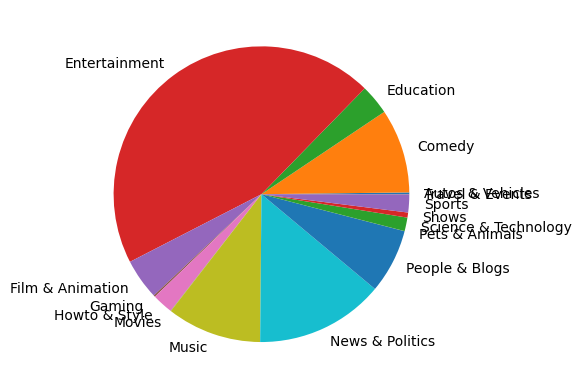

<Figure size 2000x1600 with 0 Axes>

In [ ]:
sizec=no_videos_categoryWise["size"]
c_name=no_videos_categoryWise["category_name"]
plt.pie(sizec, labels=c_name)
plt.figure(figsize=(20,16))
plt.show()

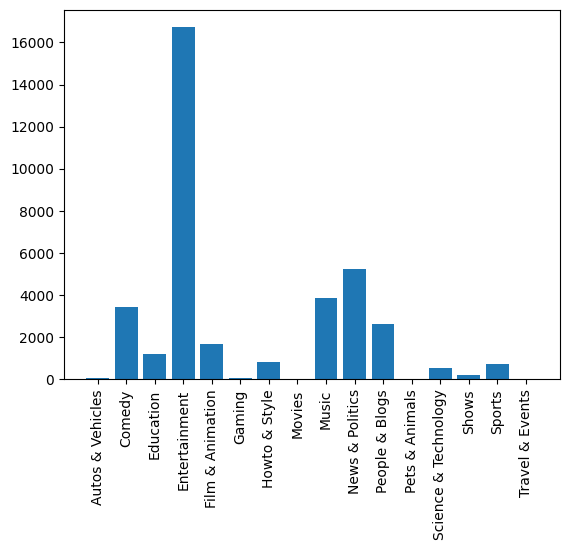

In [ ]:
plt.bar(no_videos_categoryWise["category_name"],no_videos_categoryWise["size"])
plt.xticks(rotation=90)
plt.show()

#### Analysing Entertainment Category

In [ ]:
Entertainment = merged_df[merged_df["category_name"] == "Entertainment"].sort_values(["views", "likes", "comment_count"], ascending=False)

# top 10 videos from Entertainment Category
Entertainment.head(10)

,video_id,title,channel_title,category_id,views,likes,dislikes,comment_count,thumbnail_link,category_name
9274,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,125432237,2912710,1545017,807558,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,Entertainment
9151,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,113876217,2811216,1470387,787174,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,Entertainment
9067,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,100911567,2656672,1353650,682890,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,Entertainment
8860,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,89930713,2606663,53011,347982,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment
8753,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,87449453,2584674,52176,341571,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment
8650,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,84281319,2555411,51008,339708,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment
8561,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,80360459,2513102,49170,335920,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment
8978,FlsCjmMhFmw,YouTube Rewind: The Shape of 2017 | #YouTubeRe...,YouTube Spotlight,24,75969469,2251815,1127805,827755,https://i.ytimg.com/vi/FlsCjmMhFmw/default.jpg,Entertainment
8470,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,74789251,2444956,46172,330710,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment
8379,6ZfuNTqbHE8,Marvel Studios' Avengers: Infinity War Officia...,Marvel Entertainment,24,66637636,2331352,41154,316185,https://i.ytimg.com/vi/6ZfuNTqbHE8/default.jpg,Entertainment


In [ ]:
channels = Entertainment.groupby("channel_title", as_index=False).size()
channels.sort_values(by="size",ascending=False).head(10)

,channel_title,size
618,etvteluguindia,282
165,Flowers Comedy,270
375,RadaanMedia,243
400,SAB TV,241
403,SET India,238
625,mallemalatv,238
492,Tarang TV,223
277,Mazhavil Manorama,220
565,Vijay Television,213
635,zeetv,198
